# Employee Attrition Prediction: Final Notebook

## Objective
This notebook demonstrates the end-to-end process of using a Random Forest model to predict employee attrition. It incorporates the preprocessed data, retrains the model within the notebook using the best hyperparameters, and evaluates its performance on the test dataset.

## Workflow:
1. **Data Preparation**: Load and preprocess the dataset, including handling class imbalance with SMOTE and encoding categorical features.
2. **Model Training**: Retrain the Random Forest model within this notebook using the identified best hyperparameters.
3. **Evaluation**: Assess the model's performance on the test set using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.
4. **Visualization**: Visualize the model's performance with tools such as the ROC Curve and Confusion Matrix.
5. **Conclusion**: Summarize findings, discuss business implications, and highlight potential next steps.

In [59]:
# Import necessary libraries
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Display settings
plt.style.use('seaborn-v0_8-darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("Environment set up successfully.")

Environment set up successfully.


## Data Preparation

This section focuses on preparing the dataset for modeling. The key steps include:
1. Load the pre-engineered dataset.
2. Inspect the dataset for missing values and class imbalance.
3. Apply SMOTE to handle the class imbalance in the target variable.
4. Split the resampled dataset into training and testing sets (70/30 split).
5. Encode categorical variables using one-hot encoding to ensure compatibility with machine learning models.

In [65]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Step 1: Load the dataset
data = pd.read_csv('../data/engineered_dataset.csv')
target_column = 'Attrition'
X = data.drop(columns=[target_column])
y = data[target_column]

# Step 2: Encode categorical features using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 3: Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# Verify class distribution after SMOTE
print("Class Distribution Before SMOTE:", Counter(y))
print("Class Distribution After SMOTE:", Counter(y_resampled))

# Step 4: Split the resampled data into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)

print("\nTraining Set Shape (X, y):", X_train.shape, y_train.shape)
print("Testing Set Shape (X, y):", X_test.shape, y_test.shape)

Class Distribution Before SMOTE: Counter({0: 1233, 1: 237})
Class Distribution After SMOTE: Counter({1: 1233, 0: 1233})

Training Set Shape (X, y): (1726, 49) (1726,)
Testing Set Shape (X, y): (740, 49) (740,)


/Users/quinnreams/Documents/GitHub/employee-retention-dashboard/venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


## Model Reloading

In this step, we train the Random Forest model within this notebook using the best hyperparameters identified in the previous analysis. This ensures consistency with the current dataset and preprocessing steps.

The model was trained with the following best parameters:
- `n_estimators`: 300
- `max_depth`: 20
- `min_samples_split`: 2
- `min_samples_leaf`: 1
- `class_weight`: 'balanced_subsample'

In [66]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced_subsample',
    random_state=42
)

# Train the model
best_rf_model.fit(X_train, y_train)
print("Model retrained successfully.")

Model retrained successfully.


## Model Evaluation

This step evaluates the retrained Random Forest model's performance on the test dataset. The results are as follows:

### Metrics:
1. **Accuracy**: 94%
2. **Precision, Recall, F1-Score**:
   - Class `0` (No Attrition): Precision = 92%, Recall = 95%, F1-Score = 94%.
   - Class `1` (Attrition): Precision = 95%, Recall = 92%, F1-Score = 93%.
3. **ROC-AUC**: 0.98
4. **Confusion Matrix**:


Test Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       370
           1       0.95      0.92      0.93       370

    accuracy                           0.94       740
   macro avg       0.94      0.94      0.94       740
weighted avg       0.94      0.94      0.94       740


Confusion Matrix:
[[352  18]
 [ 30 340]]

ROC-AUC Score: 0.98


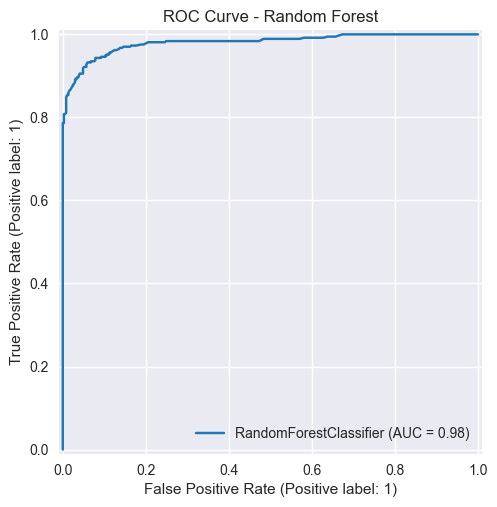

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = best_rf_model.predict(X_test)
y_proba = best_rf_model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = best_rf_model.score(X_test, y_test)
print(f"\nTest Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot ROC Curve
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {roc_auc:.2f}")
RocCurveDisplay.from_estimator(best_rf_model, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()


### Visualizations:
- The ROC Curve demonstrates excellent discrimination ability, with an AUC of 0.98.

## Conclusion

The Random Forest model demonstrated excellent performance in predicting employee attrition. With an accuracy of 94% and an AUC of 0.98, the model is highly effective at distinguishing between employees likely to leave and those likely to stay. The balanced precision, recall, and F1-scores for both classes highlight the model's robustness.

### Key Insights:
- The model can be a valuable tool for identifying at-risk employees, enabling targeted retention strategies.
- Future improvements may involve exploring additional features or fine-tuning hyperparameters further.

The results underscore the business value of data-driven approaches to employee retention.